In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

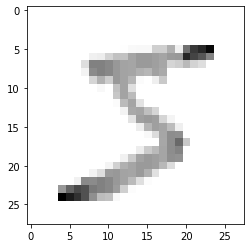

In [4]:
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [5]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 12345)

In [7]:
x_validate.shape

(12000, 28, 28)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

model = tf.keras.Sequential()


model.add(Flatten())
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 10, activation = 'sigmoid'))


In [9]:
model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001) ,metrics =['accuracy'])

In [10]:
model.fit(              
                        x_train,
                        y_train,
                        epochs = 4,
                        validation_data = (x_validate, y_validate)
)

Epoch 1/4
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4105 - accuracy: 0.8842 - val_loss: 0.2258 - val_accuracy: 0.9348
Epoch 2/4
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1997 - accuracy: 0.9407 - val_loss: 0.1838 - val_accuracy: 0.9457
Epoch 3/4
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1541 - accuracy: 0.9539 - val_loss: 0.1567 - val_accuracy: 0.9554
Epoch 4/4
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1259 - accuracy: 0.9613 - val_loss: 0.1471 - val_accuracy: 0.9561


In [11]:
evaluation = model.evaluate(x_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.1462 - accuracy: 0.9558
Test Accuracy : 0.956


In [12]:
model.save('handwritting_recognition')

INFO:tensorflow:Assets written to: handwritting_recognition\assets


In [13]:
new_model = tf.keras.models.load_model('handwritting_recognition')

In [14]:
predictions = new_model.predict([x_test])
predictions1 = new_model.predict(x_test[:10])

In [15]:
print(predictions)

[[7.1910620e-03 8.1925094e-03 8.2339716e-01 ... 9.9996060e-01
  1.6318768e-02 4.8096421e-01]
 [6.3550472e-04 8.7584805e-01 9.9991804e-01 ... 1.8739313e-02
  1.2223959e-02 6.3632820e-07]
 [4.2325258e-04 9.9813944e-01 4.1207433e-01 ... 8.9474320e-02
  5.8162248e-01 1.3160199e-02]
 ...
 [5.9596437e-05 4.7390163e-03 1.6408712e-02 ... 6.6978526e-01
  1.3399452e-01 5.6179458e-01]
 [3.2958955e-02 6.9430470e-03 3.8841963e-03 ... 1.4155626e-02
  8.5597897e-01 2.0697713e-04]
 [7.1994770e-01 3.6173791e-05 5.7308799e-01 ... 1.7846823e-03
  1.9145906e-03 5.5333367e-05]]


This number is:
0


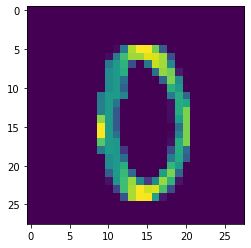

In [19]:
# you can run this cell again and again to test the accuracy!
# if it does not work properly, try restarting the whole kernal 
import random

R = random.randint(0,9999)

plt.imshow(x_test[R])
print('This number is:')
print(np.argmax(predictions[R]))

I predict this number is a: 7
Number Actually Is a: 7


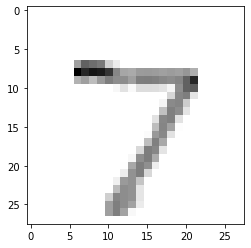

I predict this number is a: 2
Number Actually Is a: 2


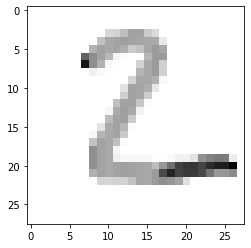

I predict this number is a: 1
Number Actually Is a: 1


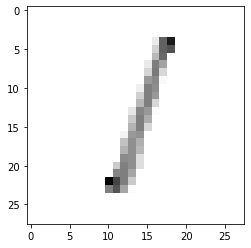

I predict this number is a: 0
Number Actually Is a: 0


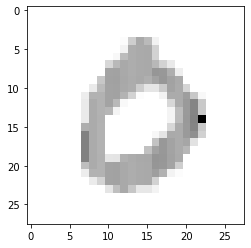

I predict this number is a: 4
Number Actually Is a: 4


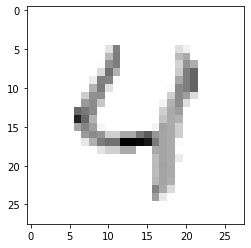

I predict this number is a: 1
Number Actually Is a: 1


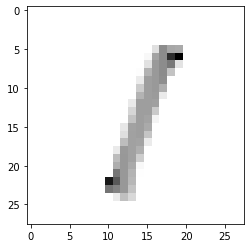

I predict this number is a: 4
Number Actually Is a: 4


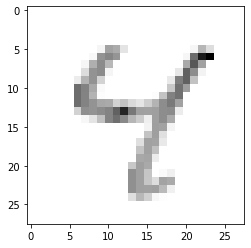

I predict this number is a: 9
Number Actually Is a: 9


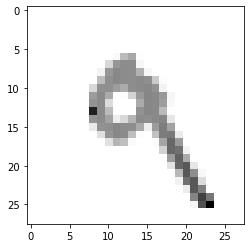

I predict this number is a: 5
Number Actually Is a: 5


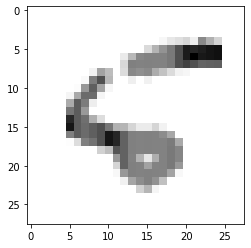

I predict this number is a: 9
Number Actually Is a: 9


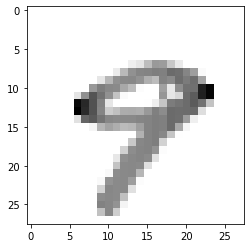

The program got 0 wrong, out of 10
100.0% correct


In [17]:
 
count = 0
for x in range(len(predictions1)):
    guess = (np.argmax(predictions1[x]))
    actual = y_test[x]
    print("I predict this number is a:", guess)
    print("Number Actually Is a:", actual)
    if guess != actual:
        
        
        count+=1
    plt.imshow(x_test[x], cmap=plt.cm.binary)
    plt.show()

print("The program got", count, 'wrong, out of', 10)
print(str(100 - ((count/10)*100)) + '% correct')
